In [1]:
#import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import os


open dataset

In [2]:
path = './data/BindingDB_All.tsv'
bdb = pd.read_csv(path, sep = '\t', on_bad_lines = 'skip', low_memory = False , nrows=100000 , dtype={'BindingDB Target Chain Sequence.1': 'object',
       'DrugBank ID of Ligand': 'object',
       'IC50 (nM)': 'object',
       'KEGG ID of Ligand': 'object',
       'Kd (nM)': 'object',
       'Ki (nM)': 'object',
       'Ligand HET ID in PDB': 'object',
       'PDB ID(s) for Ligand-Target Complex': 'object',
       'PDB ID(s) of Target Chain.1': 'object',
       'PMID': 'float64',
       'Patent Number': 'object',
       'UniProt (SwissProt) Entry Name of Target Chain.1': 'object',
       'UniProt (SwissProt) Primary ID of Target Chain.1': 'object',
       'UniProt (SwissProt) Recommended Name of Target Chain.1': 'object',
       'UniProt (SwissProt) Secondary ID(s) of Target Chain': 'object',
       'UniProt (SwissProt) Secondary ID(s) of Target Chain.1': 'object',
       'UniProt (TrEMBL) Entry Name of Target Chain': 'object',
       'UniProt (TrEMBL) Primary ID of Target Chain': 'object',
       'UniProt (TrEMBL) Secondary ID(s) of Target Chain': 'object',
       'UniProt (TrEMBL) Submitted Name of Target Chain': 'object'})

In [3]:
list(bdb.columns)

['BindingDB Reactant_set_id',
 'Ligand SMILES',
 'Ligand InChI',
 'Ligand InChI Key',
 'BindingDB MonomerID',
 'BindingDB Ligand Name',
 'Target Name',
 'Target Source Organism According to Curator or DataSource',
 'Ki (nM)',
 'IC50 (nM)',
 'Kd (nM)',
 'EC50 (nM)',
 'kon (M-1-s-1)',
 'koff (s-1)',
 'pH',
 'Temp (C)',
 'Curation/DataSource',
 'Article DOI',
 'BindingDB Entry DOI',
 'PMID',
 'PubChem AID',
 'Patent Number',
 'Authors',
 'Institution',
 'Link to Ligand in BindingDB',
 'Link to Target in BindingDB',
 'Link to Ligand-Target Pair in BindingDB',
 'Ligand HET ID in PDB',
 'PDB ID(s) for Ligand-Target Complex',
 'PubChem CID',
 'PubChem SID',
 'ChEBI ID of Ligand',
 'ChEMBL ID of Ligand',
 'DrugBank ID of Ligand',
 'IUPHAR_GRAC ID of Ligand',
 'KEGG ID of Ligand',
 'ZINC ID of Ligand',
 'Number of Protein Chains in Target (>1 implies a multichain complex)',
 'BindingDB Target Chain Sequence',
 'PDB ID(s) of Target Chain',
 'UniProt (SwissProt) Recommended Name of Target Chain',

In [6]:
bdb

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99998,CCN(CC)CCN1C(C(C(=O)c2cc3cccc(OC)c3o2)C(=O)C1=...,InChI=1S/C26H27FN2O5/c1-4-28(5-2)13-14-29-22(1...,HWZHSJQJRANRHN-UHFFFAOYSA-N,52808,1-(2-Diethylamino-ethyl)-5-(4-fluoro-phenyl)-3...,POsterior Segregation,Caenorhabditis elegans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,99999,Oc1c(C=NCCN2CCCCC2)c(=O)[nH]c(=O)n1-c1ccc(Br)cc1,InChI=1S/C18H21BrN4O3/c19-13-4-6-14(7-5-13)23-...,OEGTVGJUWAGVOD-UHFFFAOYSA-N,52809,(5E)-1-(4-bromophenyl)-5-[(2-piperidin-1-yleth...,POsterior Segregation,Caenorhabditis elegans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,100000,COc1cc2[nH]c(C(=O)NN)c(N)c2cc1OC,InChI=1S/C11H14N4O3/c1-17-7-3-5-6(4-8(7)18-2)1...,GNGHFWNKOXCBGI-UHFFFAOYSA-N,52810,"3-Amino-5,6-dimethoxy-1H-indole-2-carboxylic a...",POsterior Segregation,Caenorhabditis elegans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,100001,CC[C@@H](CO)NC(=O)[C@H]1CN(C)[C@@H]2Cc3cn(C)c4...,InChI=1S/C21H27N3O2/c1-4-15(12-25)22-21(26)14-...,KPJZHOPZRAFDTN-ZRGWGRIASA-N,30708,"(6aR,9R)-4,7-dimethyl-N-[(1S)-1-methylolpropyl...",POsterior Segregation,Caenorhabditis elegans,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transform ki col to have just numerical values (that will be clipped to max and min)

In [3]:
bdb['Ki (nM)_2'] = bdb['Ki (nM)'].str.replace('<', '', regex=False)
bdb['Ki (nM)_2'] = bdb['Ki (nM)_2'].str.replace('>', '', regex=False)
bdb['Ki (nM)_2'] = bdb['Ki (nM)_2'].astype(float)

repeat with kd

In [4]:
bdb['Kd (nM)_2'] = bdb['Kd (nM)'].str.replace('<', '', regex=False)
bdb['Kd (nM)_2'] = bdb['Kd (nM)_2'].str.replace('>', '', regex=False)
bdb['Kd (nM)_2'] = bdb['Kd (nM)_2'].astype(float)

plot distribution of ki values (under 10 nM)

<Axes: >

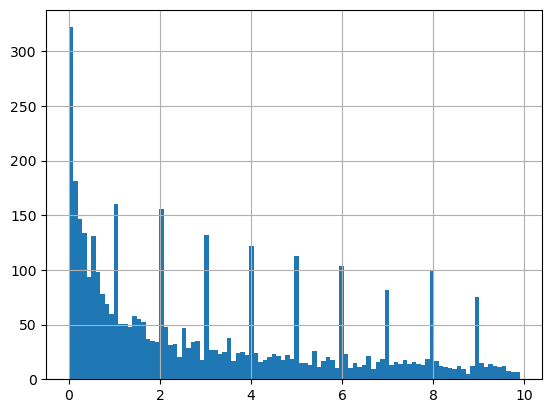

In [6]:
bdb['Ki (nM)_2'][bdb['Ki (nM)_2'] < 10].hist(bins=100)

Filter by hiv

In [5]:
bdb2 = bdb[bdb['Target Source Organism According to Curator or DataSource'] == 'Human immunodeficiency virus 1']

which are the most common target organisms?

In [6]:
(bdb['Target Source Organism According to Curator or DataSource']).value_counts(sort=True)

Target Source Organism According to Curator or DataSource
Homo sapiens                                     59063
Human immunodeficiency virus 1                    5149
Caenorhabditis elegans                            2731
Rattus norvegicus                                 2694
Bos taurus                                        1678
                                                 ...  
Xenopus laevis                                       1
Hepatitis C virus genotype 6a (isolate EUHK2)        1
Hepatitis C virus genotype 4a (isolate ED43)         1
Hepatitis C virus genotype 3a (isolate NZL1)         1
Hepatitis C virus genotype 2                         1
Name: count, Length: 118, dtype: int64

HIV dataframe shape

In [12]:
bdb2.shape

(5149, 196)

Kd is always Nan!!!!!

In [13]:
sum(bdb2['Kd (nM)'].isna())

5149

Ki distribution in hiv dataframe, to see if it's different from the entire dataframe one (doesen't seem to be)

<Axes: >

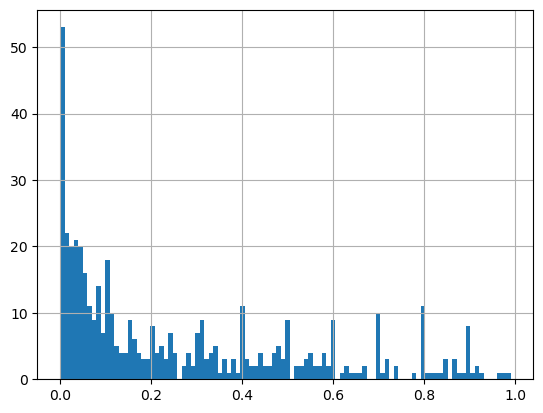

In [14]:
bdb2['Ki (nM)_2'][bdb2['Ki (nM)_2'] < 1].hist(bins=100)

try with rdkit expansion

In [7]:
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from rdkit.Chem import rdMolDescriptors
import numpy as np

These functions compute:
- 'smiles_to_mol': creates rdkit mol object from SMILES string
- 'calculate_descriptors': creates a dataframe with 12 features from the molecule
- 'calculate_morgan_fingerprint': extracts the morgan fingerprint for each molecule (with radius 2 and 2048 entries)

In [9]:
def smiles_to_mol(smiles):
    """Convert SMILES string to RDKit Mol object."""
    try:
        return Chem.MolFromSmiles(smiles)
    except:
        return None


def calculate_descriptors(mol):
    """Calculate RDKit molecular descriptors for a given molecule."""
    if mol is None:
        #return pd.Series([None] * 5, index=["MolWt", "LogP", "NumHDonors", "NumHAcceptors", "TPSA"])
        return pd.Series([None] * 12, index=[
            "MolWt", "LogP", "NumHDonors", "NumHAcceptors", "TPSA", 
            "NumRotatableBonds", "NumAromaticRings", "NumAliphaticRings", 
            "FractionCSP3", "RingCount", "FormalCharge", "NumRadicalElectrons"])
    return pd.Series({
        "MolWt": Descriptors.MolWt(mol),
        "LogP": Descriptors.MolLogP(mol),
        "NumHDonors": Descriptors.NumHDonors(mol),
        "NumHAcceptors": Descriptors.NumHAcceptors(mol),
        "TPSA": Descriptors.TPSA(mol),
        "NumRotatableBonds": Descriptors.NumRotatableBonds(mol),
        "NumAromaticRings": Descriptors.NumAromaticRings(mol),
        "NumAliphaticRings": Descriptors.NumAliphaticRings(mol),
        "FractionCSP3": Descriptors.FractionCSP3(mol),
        "RingCount": Descriptors.RingCount(mol),
        "FormalCharge": Chem.GetFormalCharge(mol),
        "NumRadicalElectrons": Descriptors.NumRadicalElectrons(mol)
    })
    #pd.Series({
        #"MolWt": Descriptors.MolWt(mol),
        #"LogP": Descriptors.MolLogP(mol),
        #"NumHDonors": Descriptors.NumHDonors(mol),
        #"NumHAcceptors": Descriptors.NumHAcceptors(mol),
        #"TPSA": Descriptors.TPSA(mol)
    #})


def calculate_morgan_fingerprint(mol, radius=2, n_bits=2048):
    """Generate Morgan fingerprint for a molecule as a bit vector."""
    if mol is None:
        return pd.Series([None])
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius)
    arr = np.zeros((n_bits,), dtype=int)
    Chem.DataStructs.ConvertToNumpyArray(fingerprint, arr)
    return arr


In [10]:
# Convert SMILES to RDKit Mol objects
bdb2['Mol'] = bdb2['Ligand SMILES'].apply(smiles_to_mol)
bdb2['Mol']

C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\1538969118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdb2['Mol'] = bdb2['Ligand SMILES'].apply(smiles_to_mol)


0        <rdkit.Chem.rdchem.Mol object at 0x00000201CF8...
1        <rdkit.Chem.rdchem.Mol object at 0x00000201CF8...
2        <rdkit.Chem.rdchem.Mol object at 0x00000201CF8...
3        <rdkit.Chem.rdchem.Mol object at 0x00000201CF8...
4        <rdkit.Chem.rdchem.Mol object at 0x00000201CF8...
                               ...                        
82708    <rdkit.Chem.rdchem.Mol object at 0x00000201CB7...
82709    <rdkit.Chem.rdchem.Mol object at 0x00000201CB7...
82710    <rdkit.Chem.rdchem.Mol object at 0x00000201CB7...
82711    <rdkit.Chem.rdchem.Mol object at 0x00000201CB7...
82712    <rdkit.Chem.rdchem.Mol object at 0x00000201CB7...
Name: Mol, Length: 5149, dtype: object

Try to print the first one

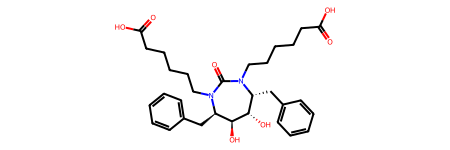

In [12]:
bdb2['Mol'][0]

In [11]:
# Calculate descriptors and add them to the DataFrame
descriptor_df = bdb2['Mol'].apply(lambda mol: calculate_descriptors(mol))
bdb2 = pd.concat([bdb2, descriptor_df], axis=1)

In [12]:
# Calculate fingerprints and add them to the DataFrame
fingerprint_df = bdb2['Mol'].apply(lambda mol: calculate_morgan_fingerprint(mol))
bindingdb_df = pd.concat([bdb2, fingerprint_df], axis=1)

[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerator
[15:53:52] DEPRECATION WARNING: please use MorganGenerat

In [23]:
list(bindingdb_df.columns)

['BindingDB Reactant_set_id',
 'Ligand SMILES',
 'Ligand InChI',
 'Ligand InChI Key',
 'BindingDB MonomerID',
 'BindingDB Ligand Name',
 'Target Name',
 'Target Source Organism According to Curator or DataSource',
 'Ki (nM)',
 'IC50 (nM)',
 'Kd (nM)',
 'EC50 (nM)',
 'kon (M-1-s-1)',
 'koff (s-1)',
 'pH',
 'Temp (C)',
 'Curation/DataSource',
 'Article DOI',
 'BindingDB Entry DOI',
 'PMID',
 'PubChem AID',
 'Patent Number',
 'Authors',
 'Institution',
 'Link to Ligand in BindingDB',
 'Link to Target in BindingDB',
 'Link to Ligand-Target Pair in BindingDB',
 'Ligand HET ID in PDB',
 'PDB ID(s) for Ligand-Target Complex',
 'PubChem CID',
 'PubChem SID',
 'ChEBI ID of Ligand',
 'ChEMBL ID of Ligand',
 'DrugBank ID of Ligand',
 'IUPHAR_GRAC ID of Ligand',
 'KEGG ID of Ligand',
 'ZINC ID of Ligand',
 'Number of Protein Chains in Target (>1 implies a multichain complex)',
 'BindingDB Target Chain Sequence',
 'PDB ID(s) of Target Chain',
 'UniProt (SwissProt) Recommended Name of Target Chain',

Now try to see how the descriptors look like

In [24]:
descriptor_df

,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,NumAromaticRings,NumAliphaticRings,FractionCSP3,RingCount,FormalCharge,NumRadicalElectrons
0,554.684,3.95840,4.0,5.0,138.61,16.0,2.0,1.0,0.516129,3.0,0.0,0.0
1,538.652,3.54140,4.0,5.0,121.37,10.0,4.0,1.0,0.258065,5.0,0.0,0.0
2,486.616,3.51490,3.0,4.0,92.69,9.0,3.0,2.0,0.379310,5.0,0.0,0.0
3,480.649,3.63110,3.0,4.0,84.24,12.0,2.0,2.0,0.551724,4.0,0.0,0.0
4,466.622,3.24100,3.0,4.0,84.24,11.0,2.0,2.0,0.535714,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82708,306.385,4.25852,0.0,2.0,26.25,4.0,3.0,0.0,0.150000,3.0,1.0,0.0
82709,359.360,4.39780,1.0,4.0,67.49,4.0,4.0,0.0,0.000000,4.0,0.0,0.0
82710,359.360,4.39780,1.0,4.0,67.49,4.0,4.0,0.0,0.000000,4.0,0.0,0.0
82711,410.434,2.50692,3.0,6.0,112.66,4.0,4.0,0.0,0.105263,4.0,0.0,0.0


And the fingerprints (vector of 2048 entries for each ligand)

In [25]:
fingerprint_df

0        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
82708    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
82709    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
82710    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
82711    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
82712    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Mol, Length: 5149, dtype: object

In [26]:
sum(bindingdb_df['Ki (nM)_2'].isna())

3463

How many missing values do we have?

In [116]:
# Calculate the number of NaNs in each column
nan_counts = bindingdb_df.isna().sum()

# Sort the columns by the number of NaNs in descending order
nan_counts_sorted = nan_counts.sort_values(ascending=False)

print(nan_counts_sorted)

kon (M-1-s-1)                                             5149
koff (s-1)                                                5149
Kd (nM)                                                   5149
PDB ID(s) of Target Chain.3                               5149
UniProt (SwissProt) Recommended Name of Target Chain.3    5149
                                                          ... 
LogP                                                         0
NumHDonors                                                   0
NumHAcceptors                                                0
TPSA                                                         0
Mol                                                          0
Length: 208, dtype: int64


drop columns with more than 50% nans

In [13]:
# Calculate the threshold for 50% missing values
threshold = len(bindingdb_df) * 0.5

# Drop columns with more than 50% NaNs
bindingdb_df_cleaned = bindingdb_df.dropna(axis=1, thresh=threshold)

Surprisingly, out of the 208 initial columns (196 plus the ones obtained from RDKit), just 43 have less than 50% Null values.

In [28]:
bindingdb_df_cleaned.shape

(5149, 45)

We can also see which are such columns

In [145]:
print(list(bindingdb_df_cleaned.columns))

['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI', 'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name', 'Target Name', 'Target Source Organism According to Curator or DataSource', 'IC50 (nM)', 'pH', 'Temp (C)', 'Curation/DataSource', 'Article DOI', 'BindingDB Entry DOI', 'PMID', 'PubChem AID', 'Authors', 'Institution', 'Link to Ligand in BindingDB', 'Link to Target in BindingDB', 'Link to Ligand-Target Pair in BindingDB', 'PubChem CID', 'PubChem SID', 'ZINC ID of Ligand', 'Number of Protein Chains in Target (>1 implies a multichain complex)', 'BindingDB Target Chain Sequence', 'PDB ID(s) of Target Chain', 'UniProt (SwissProt) Recommended Name of Target Chain', 'UniProt (SwissProt) Entry Name of Target Chain', 'UniProt (SwissProt) Primary ID of Target Chain', 'UniProt (SwissProt) Secondary ID(s) of Target Chain', 'Mol', 'MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'Mol']


See, again, after the deletion, how many Null values remain in the other columns

In [29]:
# Calculate the number of NaNs in each column
nan_countscl = bindingdb_df_cleaned.isna().sum()

# Sort the columns by the number of NaNs in descending order
nan_counts_sortedcl = nan_countscl.sort_values(ascending=False)

print(nan_counts_sortedcl)

UniProt (SwissProt) Secondary ID(s) of Target Chain                     2524
Temp (C)                                                                2209
pH                                                                      1939
IC50 (nM)                                                               1641
PMID                                                                     107
PDB ID(s) of Target Chain                                                102
ZINC ID of Ligand                                                         95
Article DOI                                                               67
PubChem AID                                                               65
UniProt (SwissProt) Recommended Name of Target Chain                      26
UniProt (SwissProt) Primary ID of Target Chain                            26
UniProt (SwissProt) Entry Name of Target Chain                            26
BindingDB Reactant_set_id                                                  0

This piece of code tries to convert columns to numerical values, if it fails for whatever reason, the column is jsut lef as it is. This is a first step for the conversion, others will be done successively.

In [14]:
# Iterate over each column and convert to np.float64 if possible
for col in bindingdb_df_cleaned.columns:
    try:
        # Attempt to convert the column to numeric (forcing np.float64)
        bindingdb_df_cleaned[col] = pd.to_numeric(bindingdb_df_cleaned[col], errors='raise').astype(np.float64)
    except (ValueError, TypeError):
        # If conversion fails, leave the column as it is
        pass

C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\186673590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned[col] = pd.to_numeric(bindingdb_df_cleaned[col], errors='raise').astype(np.float64)
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\186673590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned[col] = pd.to_numeric(bindingdb_df_cleaned[col], errors='raise').astype(np.float64)
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\186673590.py:5: SettingWithCop

In [188]:
bindingdb_df_cleaned

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,IC50 (nM),pH,...,LogP,NumHDonors,NumHAcceptors,TPSA,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,Mol
0,1.0,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734.0,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,NaN,5.5,...,3.95840,4.0,5.0,138.61,554.684,3.95840,4.0,5.0,138.61,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2.0,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22.0,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,NaN,5.5,...,3.54140,4.0,5.0,121.37,538.652,3.54140,4.0,5.0,121.37,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3.0,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23.0,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,NaN,5.5,...,3.51490,3.0,4.0,92.69,486.616,3.51490,3.0,4.0,92.69,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4.0,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24.0,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,NaN,5.5,...,3.63110,3.0,4.0,84.24,480.649,3.63110,3.0,4.0,84.24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5.0,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25.0,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,NaN,5.5,...,3.24100,3.0,4.0,84.24,466.622,3.24100,3.0,4.0,84.24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82708,82711.0,COc1ccc(\C=C\c2cc(o[n+]2C)-c2ccc(C)cc2)cc1,InChI=1S/C20H20NO2/c1-15-4-9-17(10-5-15)20-14-...,GCMJZTYDJGPOQW-IZZDOVSWSA-N,44553.0,3-[(E)-2-(4-methoxyphenyl)ethenyl]-2-methyl-5-...,Protein Rev [8-24],Human immunodeficiency virus 1,>79370,NaN,...,4.25852,0.0,2.0,26.25,306.385,4.25852,0.0,2.0,26.25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
82709,82712.0,Fc1ccc(C=NNC(=O)c2cc(nc3ccccc23)-c2ccco2)cc1,InChI=1S/C21H14FN3O2/c22-15-9-7-14(8-10-15)13-...,RFAKOGFXPBSUBF-UHFFFAOYSA-N,40727.0,MLS000537135::N&#39;-(4-fluorobenzylidene)-2-(...,Protein Rev [8-24],Human immunodeficiency virus 1,>79370,NaN,...,4.39780,1.0,4.0,67.49,359.360,4.39780,1.0,4.0,67.49,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
82710,82713.0,Fc1cccc(C=NNC(=O)c2cc(nc3ccccc23)-c2ccco2)c1,InChI=1S/C21H14FN3O2/c22-15-6-3-5-14(11-15)13-...,NCWJNVZGQDGGJK-UHFFFAOYSA-N,41073.0,MLS000325120::N&#39;-(3-fluorobenzylidene)-2-(...,Protein Rev [8-24],Human immunodeficiency virus 1,>79370,NaN,...,4.39780,1.0,4.0,67.49,359.360,4.39780,1.0,4.0,67.49,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
82711,82714.0,Cc1ccc(cc1)C(=O)NNC(=O)CSc1nnc2c(n1)[nH]c1ccc(...,InChI=1S/C19H15FN6O2S/c1-10-2-4-11(5-3-10)18(2...,ZYESNEPSHICSBX-UHFFFAOYSA-N,41076.0,4-Methyl-benzoic acid N&#39;-[2-(6-fluoro-9H-1...,Protein Rev [8-24],Human immunodeficiency virus 1,>79370,NaN,...,2.50692,3.0,6.0,112.66,410.434,2.50692,3.0,6.0,112.66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


**FIRST CLEANING:**

The IC50 column has clipped values indicated with '<x' or '>x'. the process is to remove the < and >, and then convert the result to float. (in caso usare altro metodo)

In [15]:
bindingdb_df_cleaned['IC50 (nM)'] = bindingdb_df_cleaned['IC50 (nM)'].str.replace('<', '', regex=False)
bindingdb_df_cleaned['IC50 (nM)'] = bindingdb_df_cleaned['IC50 (nM)'].str.replace('>', '', regex=False)
bindingdb_df_cleaned['IC50 (nM)'] = bindingdb_df_cleaned['IC50 (nM)'].astype(float)

C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\931700904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned['IC50 (nM)'] = bindingdb_df_cleaned['IC50 (nM)'].str.replace('<', '', regex=False)
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\931700904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned['IC50 (nM)'] = bindingdb_df_cleaned['IC50 (nM)'].str.replace('>', '', regex=False)
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\931700904.py:3: SettingWithCop

**Second Cleaning:**

The column with the temperature has 'C' after each value. Each entry is stripped and each C is removed, then conversion to float is applied.

In [16]:
bindingdb_df_cleaned['Temp (C)'] = bindingdb_df_cleaned['Temp (C)'].str.replace('C', '', regex=False)
bindingdb_df_cleaned['Temp (C)'] = bindingdb_df_cleaned['Temp (C)'].str.strip()
bindingdb_df_cleaned['Temp (C)'] = bindingdb_df_cleaned['Temp (C)'].astype(float)

C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\2607676004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned['Temp (C)'] = bindingdb_df_cleaned['Temp (C)'].str.replace('C', '', regex=False)
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\2607676004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned['Temp (C)'] = bindingdb_df_cleaned['Temp (C)'].str.strip()
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\2607676004.py:3: SettingWithCopyWarning: 
A value is t

**Nan columns converion**

If a columns has nans and numbers, probably the numbers are saved as strings. this piece of code converts numerical values of such columns to float datatype

In [17]:
# Select columns that contain NaNs
columns_with_nans_nn = bindingdb_df_cleaned.columns[bindingdb_df_cleaned.isna().any()]

# Convert columns with NaNs to np.float64 if they contain only numeric values or NaNs
for col in columns_with_nans_nn:
    if bindingdb_df_cleaned[col].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x)).all():
        # Convert column to np.float64
        bindingdb_df_cleaned[col] = bindingdb_df_cleaned[col].astype(np.float64)


C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\748551717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned[col] = bindingdb_df_cleaned[col].astype(np.float64)
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\748551717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bindingdb_df_cleaned[col] = bindingdb_df_cleaned[col].astype(np.float64)
C:\Users\Utente\AppData\Local\Temp\ipykernel_9848\748551717.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Now drop columns that won't be used (the first has too many nans and it's not important, the second and third are not important for ligand structures)

In [18]:
### DROP COLUMNS: TEMP, PH, OTHERS
### DROP RAWS WITH NANS

bindingdb_df_cleaned = bindingdb_df_cleaned.drop(columns= ['UniProt (SwissProt) Secondary ID(s) of Target Chain','Temp (C)','pH'])

Now that the columns are ok, we can drop rows with null values

In [19]:
bindingdb_df_cleaned = bindingdb_df_cleaned.dropna()

In [21]:
bindingdb_df_cleaned.shape

(3263, 42)

Now, to perform numerical analysis on numerical columns (and avoid calling everytime numerical columns), we divide the dataframe in numeric and non numeric columns.

In [20]:
# Separate numerical and non-numerical columns
numerical_cols = bindingdb_df_cleaned.select_dtypes(include=['number']).columns
non_numerical_cols = bindingdb_df_cleaned.select_dtypes(exclude=['number']).columns

# Create DataFrames for numerical and non-numerical data
numerical_df = bindingdb_df_cleaned[numerical_cols]
non_numerical_df = bindingdb_df_cleaned[non_numerical_cols]

Now we can see which are the numerical columns with Null values:

In [21]:
# Calculate the number of NaNs in each column
nan_countsn = numerical_df.isna().sum()

# Sort the columns by the number of NaNs in descending order
nan_counts_sortedn = nan_countsn.sort_values(ascending=False)

print(nan_counts_sortedn)

BindingDB Reactant_set_id                                               0
BindingDB MonomerID                                                     0
IC50 (nM)                                                               0
PMID                                                                    0
PubChem CID                                                             0
PubChem SID                                                             0
Number of Protein Chains in Target (>1 implies a multichain complex)    0
MolWt                                                                   0
LogP                                                                    0
NumHDonors                                                              0
NumHAcceptors                                                           0
TPSA                                                                    0
NumRotatableBonds                                                       0
NumAromaticRings                      

Drop duplicate columns from numerical dataframe, then normalize values between 0 and 1

In [22]:
numerical_df = numerical_df.T.drop_duplicates().T
numerical_df = (numerical_df - numerical_df.min())/(numerical_df.max() - numerical_df.min())

Some cells, left as not ran, contain new possible usable features that were tried just as experiments (as 1 - IC50, log(IC50) and some interaction terms). they are marked with comments 'TN'.

In [ ]:
numerical_df['newIC50'] = 1 - numerical_df['IC50 (nM)'] #T1

Drop columns which do not contain Nans but are unuseful for numerical analysis (they are articles IDs, not molecular features!).

In [23]:
dfa = numerical_df.drop(columns=['PMID', 'PubChem CID','PubChem SID','NumRadicalElectrons'])

Rename this column as it was too long

In [24]:
dfa = dfa.rename(columns={'Number of Protein Chains in Target (>1 implies a multichain complex)':'N. of protein chains in target'})

Now plot the correlation matrix of the numerical dataframe

Text(0.5, 1.0, 'Correlation Matrix')

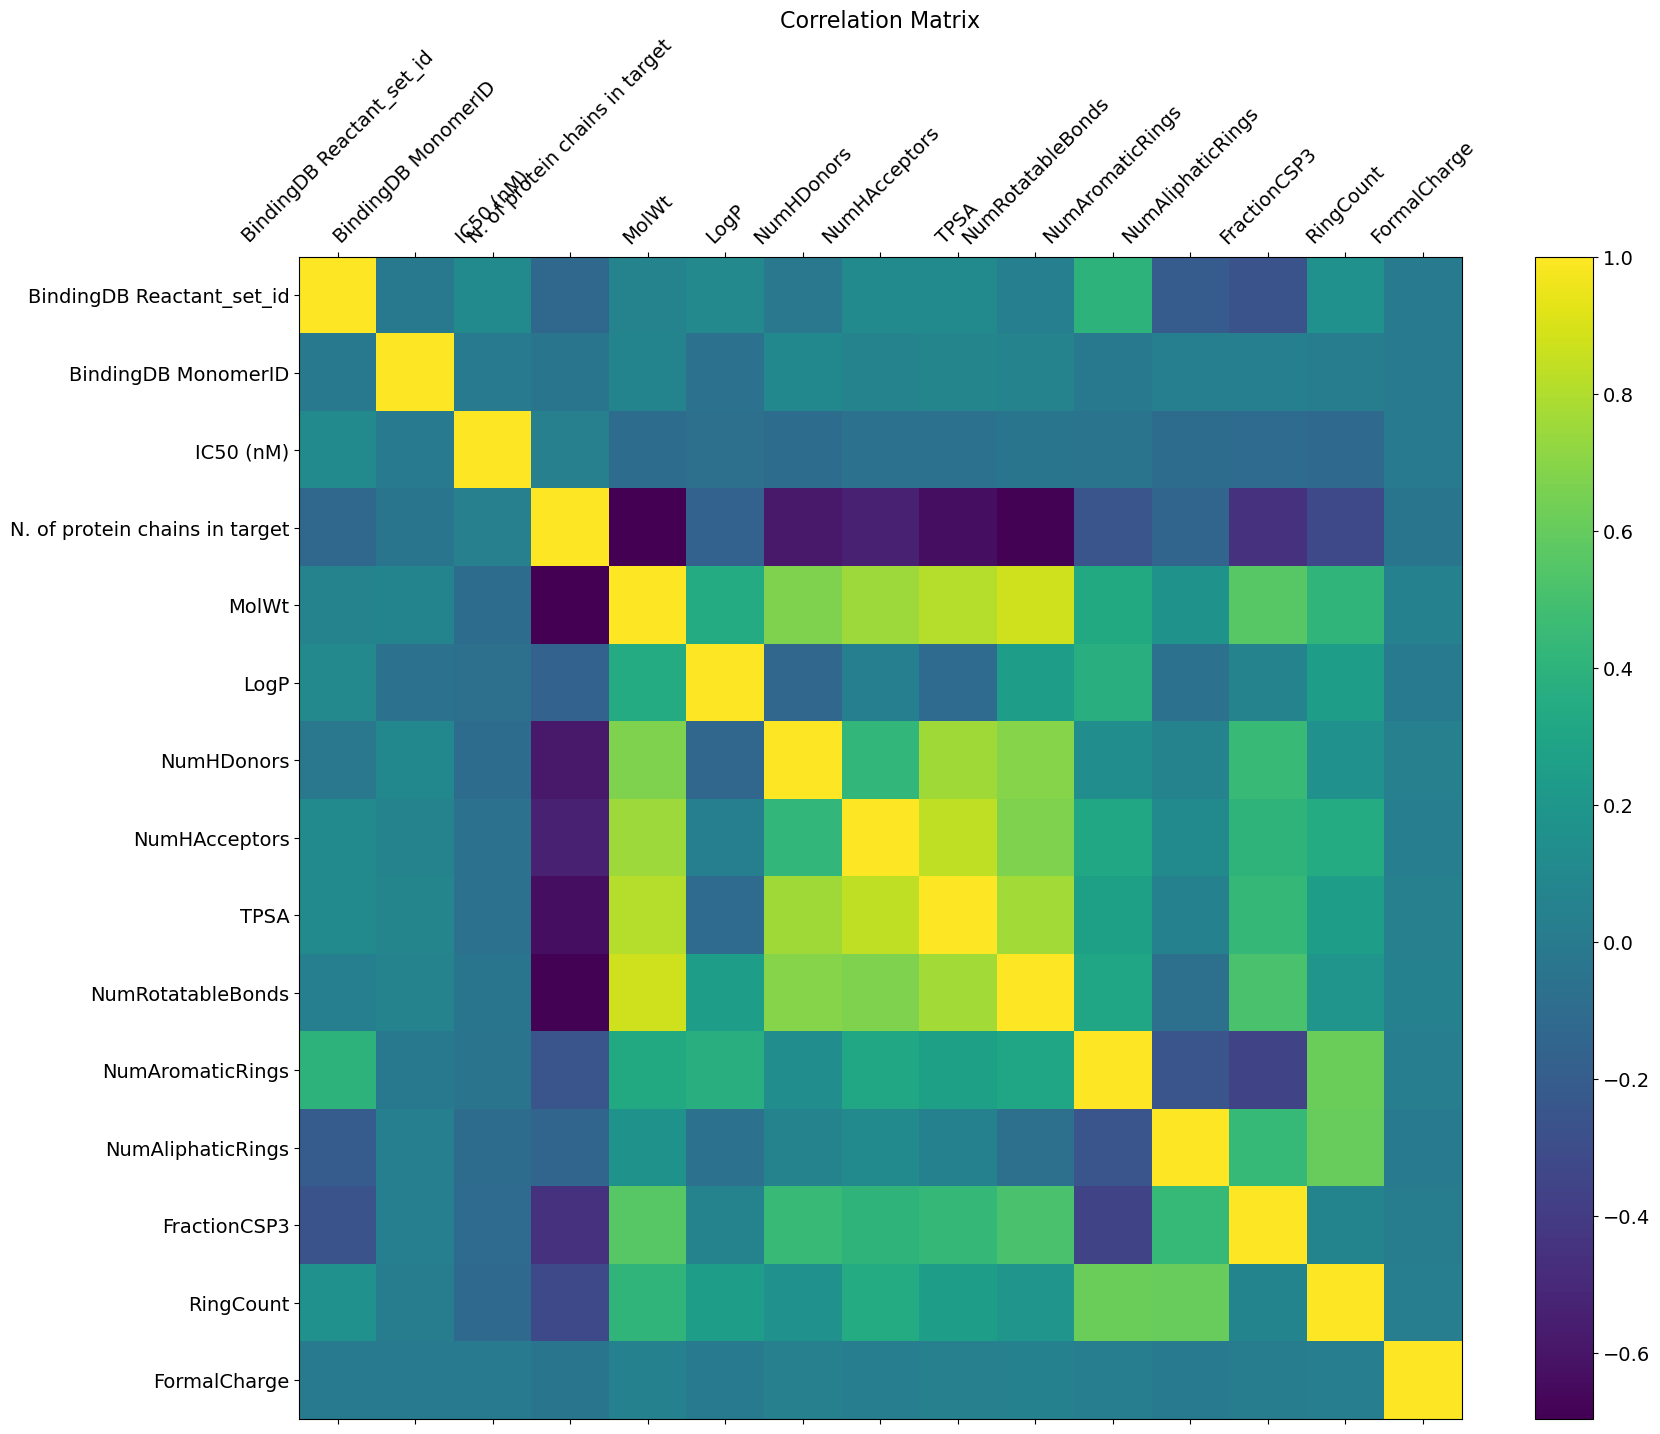

In [25]:
f = plt.figure(figsize=(19, 15))
plt.matshow(dfa.corr(), fignum=f.number)
plt.xticks(range(dfa.select_dtypes(['number']).shape[1]), dfa.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfa.select_dtypes(['number']).shape[1]), dfa.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Other visualization

In [26]:
corr = dfa.corr()
corr.style.background_gradient(cmap='coolwarm')

,BindingDB Reactant_set_id,BindingDB MonomerID,IC50 (nM),N. of protein chains in target,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,NumAromaticRings,NumAliphaticRings,FractionCSP3,RingCount,FormalCharge
BindingDB Reactant_set_id,1.000000,-0.007862,0.105232,-0.132513,0.064035,0.098768,-0.015042,0.105855,0.111282,0.032643,0.399277,-0.202504,-0.263770,0.163895,0.002274
BindingDB MonomerID,-0.007862,1.000000,-0.004713,-0.035132,0.065492,-0.064910,0.096165,0.063077,0.075279,0.059036,-0.013552,0.033574,0.034520,0.016028,-0.000597
IC50 (nM),0.105232,-0.004713,1.000000,0.041669,-0.097394,-0.068118,-0.095828,-0.064712,-0.062757,-0.036249,-0.042537,-0.098773,-0.104428,-0.114776,-0.006116
N. of protein chains in target,-0.132513,-0.035132,0.041669,1.000000,-0.697173,-0.162604,-0.583017,-0.542556,-0.633733,-0.689966,-0.248628,-0.146680,-0.455910,-0.322630,-0.034467
MolWt,0.064035,0.065492,-0.097394,-0.697173,1.000000,0.346276,0.674578,0.752736,0.810272,0.879813,0.336223,0.165998,0.556539,0.410131,0.046480
LogP,0.098768,-0.064910,-0.068118,-0.162604,0.346276,1.000000,-0.135941,0.037916,-0.101031,0.253928,0.363678,-0.056883,0.064821,0.252434,0.001693
NumHDonors,-0.015042,0.096165,-0.095828,-0.583017,0.674578,-0.135941,1.000000,0.423343,0.756083,0.693757,0.136423,0.063661,0.445928,0.163425,0.041844
NumHAcceptors,0.105855,0.063077,-0.064712,-0.542556,0.752736,0.037916,0.423343,1.000000,0.835107,0.675081,0.322048,0.105782,0.409080,0.349808,0.030890
TPSA,0.111282,0.075279,-0.062757,-0.633733,0.810272,-0.101031,0.756083,0.835107,1.000000,0.761484,0.266062,0.048397,0.435228,0.257463,0.044575
NumRotatableBonds,0.032643,0.059036,-0.036249,-0.689966,0.879813,0.253928,0.693757,0.675081,0.761484,1.000000,0.302634,-0.073540,0.515765,0.188873,0.047916


Add interaction

In [ ]:
dfa['chain_ph_int'] = dfa['NumRotatableBonds'] * dfa['MolWt'] #T2

retry correlation

In [77]:
corr2 =dfa.corr()
corr2.style.background_gradient(cmap='coolwarm')

,BindingDB Reactant_set_id,BindingDB MonomerID,IC50 (nM),N. of protein chains in target,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,NumAromaticRings,NumAliphaticRings,FractionCSP3,RingCount,FormalCharge,newIC50,chain_ph_int
BindingDB Reactant_set_id,1.000000,-0.007862,0.105232,-0.132513,0.064035,0.098768,-0.015042,0.105855,0.111282,0.032643,0.399277,-0.202504,-0.263770,0.163895,0.002274,-0.105232,0.027572
BindingDB MonomerID,-0.007862,1.000000,-0.004713,-0.035132,0.065492,-0.064910,0.096165,0.063077,0.075279,0.059036,-0.013552,0.033574,0.034520,0.016028,-0.000597,0.004713,0.082357
IC50 (nM),0.105232,-0.004713,1.000000,0.041669,-0.097394,-0.068118,-0.095828,-0.064712,-0.062757,-0.036249,-0.042537,-0.098773,-0.104428,-0.114776,-0.006116,-1.000000,-0.061113
N. of protein chains in target,-0.132513,-0.035132,0.041669,1.000000,-0.697173,-0.162604,-0.583017,-0.542556,-0.633733,-0.689966,-0.248628,-0.146680,-0.455910,-0.322630,-0.034467,-0.041669,-0.691610
MolWt,0.064035,0.065492,-0.097394,-0.697173,1.000000,0.346276,0.674578,0.752736,0.810272,0.879813,0.336223,0.165998,0.556539,0.410131,0.046480,0.097394,0.920100
LogP,0.098768,-0.064910,-0.068118,-0.162604,0.346276,1.000000,-0.135941,0.037916,-0.101031,0.253928,0.363678,-0.056883,0.064821,0.252434,0.001693,0.068118,0.219833
NumHDonors,-0.015042,0.096165,-0.095828,-0.583017,0.674578,-0.135941,1.000000,0.423343,0.756083,0.693757,0.136423,0.063661,0.445928,0.163425,0.041844,0.095828,0.727015
NumHAcceptors,0.105855,0.063077,-0.064712,-0.542556,0.752736,0.037916,0.423343,1.000000,0.835107,0.675081,0.322048,0.105782,0.409080,0.349808,0.030890,0.064712,0.691165
TPSA,0.111282,0.075279,-0.062757,-0.633733,0.810272,-0.101031,0.756083,0.835107,1.000000,0.761484,0.266062,0.048397,0.435228,0.257463,0.044575,0.062757,0.796320
NumRotatableBonds,0.032643,0.059036,-0.036249,-0.689966,0.879813,0.253928,0.693757,0.675081,0.761484,1.000000,0.302634,-0.073540,0.515765,0.188873,0.047916,0.036249,0.959250


In [ ]:
import seaborn as sns

Plot IC50 distribution

(array([-0.00025,  0.     ,  0.00025,  0.0005 ,  0.00075,  0.001  ,
         0.00125,  0.0015 ,  0.00175,  0.002  ,  0.00225]),
 [Text(-0.00025, 0, '−0.00025'),
  Text(0.0, 0, '0.00000'),
  Text(0.00025, 0, '0.00025'),
  Text(0.0005, 0, '0.00050'),
  Text(0.00075, 0, '0.00075'),
  Text(0.001, 0, '0.00100'),
  Text(0.00125, 0, '0.00125'),
  Text(0.0015, 0, '0.00150'),
  Text(0.00175, 0, '0.00175'),
  Text(0.002, 0, '0.00200'),
  Text(0.0022500000000000003, 0, '0.00225')])

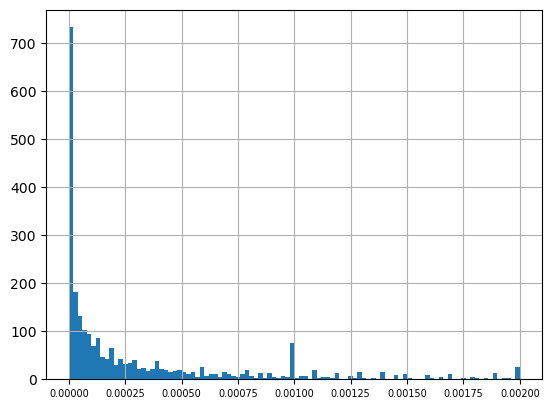

In [ ]:
dfa['IC50 (nM)'][dfa['IC50 (nM)'] < 0.002].hist(bins=100)
plt.xticks(fontsize=7)
plt.show()

In [ ]:
dfa['IC50 (nM)'] = dfa['IC50 (nM)'] + 10e-6 #deprecated, was to test the log, but it adds artifacts
dfa['IC50_log'] = np.log(dfa['IC50 (nM)']) #T3

<Axes: >

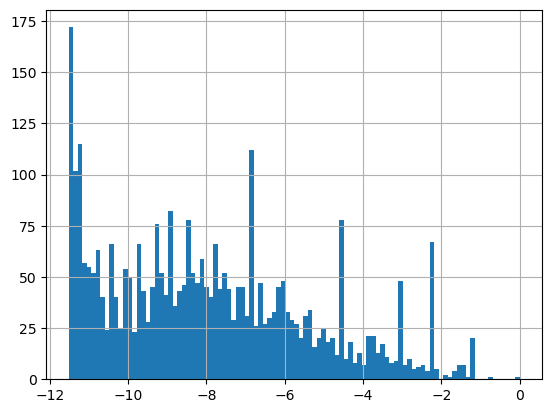

In [93]:
dfa['IC50_log'].hist(bins=100)

In [31]:
df_low_IC50 = dfa[dfa['IC50 (nM)'] < 0.00025]

In [33]:
print(df_low_IC50.shape)

(1638, 15)


From the IC50 histogram, a threshold of 0.00025is chosen to represent the 'optimal' binding ligands. correlation matrix is plot again on this subdataframe

In [34]:
corr3 =df_low_IC50.corr()
corr3.style.background_gradient(cmap='coolwarm')

,BindingDB Reactant_set_id,BindingDB MonomerID,IC50 (nM),N. of protein chains in target,MolWt,LogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,NumAromaticRings,NumAliphaticRings,FractionCSP3,RingCount,FormalCharge
BindingDB Reactant_set_id,1.000000,0.975488,-0.130996,-0.147205,0.038010,0.025234,-0.058994,0.190376,0.153519,-0.025994,0.488730,-0.198135,-0.314595,0.254971,0.001580
BindingDB MonomerID,0.975488,1.000000,-0.123816,-0.130908,0.023292,0.027680,-0.072316,0.178740,0.140213,-0.040942,0.495752,-0.218781,-0.335807,0.243787,0.002709
IC50 (nM),-0.130996,-0.123816,1.000000,0.403554,-0.344711,-0.134780,-0.261757,-0.235569,-0.300522,-0.287712,-0.076167,0.000762,-0.199843,-0.064858,-0.030597
N. of protein chains in target,-0.147205,-0.130908,0.403554,1.000000,-0.785794,-0.158976,-0.585933,-0.656823,-0.719225,-0.731258,-0.213371,-0.200794,-0.585475,-0.350966,-0.035611
MolWt,0.038010,0.023292,-0.344711,-0.785794,1.000000,0.211333,0.741998,0.768703,0.858286,0.902684,0.290924,0.202402,0.602417,0.418993,0.053347
LogP,0.025234,0.027680,-0.134780,-0.158976,0.211333,1.000000,-0.209407,-0.008469,-0.146240,0.117769,0.289734,-0.037366,0.014928,0.217965,-0.000563
NumHDonors,-0.058994,-0.072316,-0.261757,-0.585933,0.741998,-0.209407,1.000000,0.470265,0.801896,0.780358,0.067317,0.027103,0.502645,0.080492,0.046981
NumHAcceptors,0.190376,0.178740,-0.235569,-0.656823,0.768703,-0.008469,0.470265,1.000000,0.830107,0.691372,0.371802,0.188146,0.433787,0.476646,0.034999
TPSA,0.153519,0.140213,-0.300522,-0.719225,0.858286,-0.146240,0.801896,0.830107,1.000000,0.828626,0.296889,0.079448,0.482041,0.321559,0.050261
NumRotatableBonds,-0.025994,-0.040942,-0.287712,-0.731258,0.902684,0.117769,0.780358,0.691372,0.828626,1.000000,0.235630,-0.012577,0.575508,0.192121,0.057321


### Findings ###

Higher affinity (low IC50) is correlated with the number of protein chains in target and with chain_ph_int

Compute now tanimoto similarity between high affinity drugs. 

## Method: ##

As there are more or less 1600 molecules, compute the similarity between each pair is not feasible. For this reason, similarity is more likely to be computed from each couple of a sample of size s out of these 1600. But what value should be given to s? The answer can be given considering atrade-off between statistical significance (not too low N) and computational resources (not too high). Considering that for a population of size N an ideal value starts from \sqrt{N}, the lower bound for N is around 41. THe upper bound can be obtained by experimenting different values. An initial value of N=100 is chosen. (4950 pairs).
But before, try with the whole 1648 ones (it worked :) )

In [35]:
np.random.seed(42)
mask = np.random.randint(low=0, high=1637,size=(100,))

In [58]:
df_low_IC50.shape

(1638, 16)

To take the morgan fingerprints take the non numerical dataframe, change column names and take the same samples obtained from the low IC50 dataframe
Start by renaming columns with the right names and drop duplicates

In [36]:
cols = ['Ligand SMILES', 'Ligand InChI', 'Ligand InChI Key',
       'BindingDB Ligand Name', 'Target Name',
       'Target Source Organism According to Curator or DataSource',
       'Curation/DataSource', 'Article DOI', 'BindingDB Entry DOI',
       'PubChem AID', 'Authors', 'Institution', 'Link to Ligand in BindingDB',
       'Link to Target in BindingDB',
       'Link to Ligand-Target Pair in BindingDB', 'ZINC ID of Ligand',
       'BindingDB Target Chain Sequence', 'PDB ID(s) of Target Chain',
       'UniProt (SwissProt) Recommended Name of Target Chain',
       'UniProt (SwissProt) Entry Name of Target Chain',
       'UniProt (SwissProt) Primary ID of Target Chain', 'Mol', 'Morgan_f', 'Mol',
       'Morgan_f']

In [37]:
non_numerical_df.columns = cols

In [38]:
non_numerical_df = non_numerical_df.loc[:, ~non_numerical_df.columns.duplicated()]

In [47]:
non_numerical_df_lowIC50 = non_numerical_df.loc[df_low_IC50.index]

Sample dataframe, at the end used the total 1648 samples.

In [49]:
df_sample = non_numerical_df_lowIC50.iloc[mask]

In [51]:
print(df_sample.shape)

(100, 23)


In [52]:
df_sample.columns

Index(['Ligand SMILES', 'Ligand InChI', 'Ligand InChI Key',
       'BindingDB Ligand Name', 'Target Name',
       'Target Source Organism According to Curator or DataSource',
       'Curation/DataSource', 'Article DOI', 'BindingDB Entry DOI',
       'PubChem AID', 'Authors', 'Institution', 'Link to Ligand in BindingDB',
       'Link to Target in BindingDB',
       'Link to Ligand-Target Pair in BindingDB', 'ZINC ID of Ligand',
       'BindingDB Target Chain Sequence', 'PDB ID(s) of Target Chain',
       'UniProt (SwissProt) Recommended Name of Target Chain',
       'UniProt (SwissProt) Entry Name of Target Chain',
       'UniProt (SwissProt) Primary ID of Target Chain', 'Mol', 'Morgan_f'],
      dtype='object')

In [56]:
fingerprints = non_numerical_df_lowIC50['Morgan_f'].values
fingerprints[0]

array([0, 1, 1, ..., 0, 0, 0])

Compute similarity matrix between the high affinity ligands using tanimoto similarity

In [64]:
from rdkit import DataStructs

# Example: Convert a numpy array to ExplicitBitVect for TanimotoSimilarity
def numpy_to_bitvect(np_array):
    # Convert numpy array (binary) to an ExplicitBitVect
    bit_vect = DataStructs.CreateFromBitString(''.join(str(int(x)) for x in np_array))
    return bit_vect

# Assuming non_numerical_df_lowIC50['Morgan_f'] contains numpy arrays representing Morgan fingerprints
fingerprints = [numpy_to_bitvect(fp) for fp in non_numerical_df_lowIC50['Morgan_f'].values]

# Initialize a 2D array to store the Tanimoto similarity values
n = len(fingerprints)
similarity_matrix = np.zeros((n, n))

# Compute the Tanimoto similarity between each pair of fingerprints
for i in range(n):
    for j in range(i + 1, n):  # Only compute for j > i to avoid repetition
        similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        similarity_matrix[i, j] = similarity
        similarity_matrix[j, i] = similarity  # Symmetric matrix

# Now similarity_matrix contains all pairwise Tanimoto similarities
# If you need them in a flattened array (e.g., for further analysis or plotting)
similarities = similarity_matrix[np.triu_indices(n, 1)]  # Flatten upper triangle of the matrix

# Print the Tanimoto similarities
print(similarities)

[0.796875   0.76119403 0.72857143 ... 0.80597015 0.74647887 0.73611111]


In [65]:
similarity_matrix.shape

(1638, 1638)

Plot the similarity matrix

<Axes: >

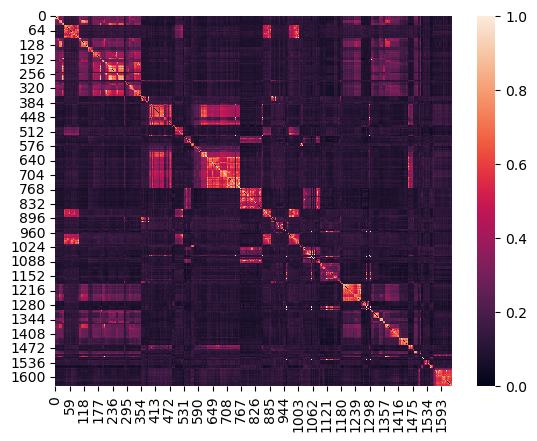

In [66]:
sns.heatmap(similarity_matrix)

Some samples look similar, but the majority is lower than 0.3

Now plot the similarity histogram on the flattened half matrix (as it's symmetrical)

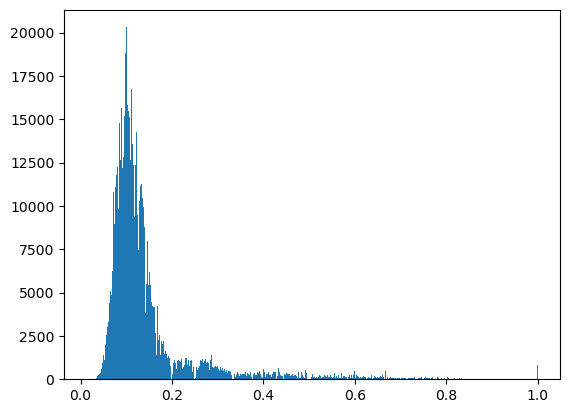

In [68]:
plt.hist(similarities, bins=1000)
plt.show()

Simple summary statistics

In [69]:
avg_similarity = np.mean(similarities)
min_similarity = np.min(similarities)
max_similarity = np.max(similarities)

print(f'Average similarity: {avg_similarity}')
print(f'Min similarity: {min_similarity}')
print(f'Max similarity: {max_similarity}')

Average similarity: 0.14825198363056713
Min similarity: 0.013157894736842105
Max similarity: 1.0


Now see if average similarity between each sample and the others is correlated with IC50

In [74]:
df_sample_n = df_low_IC50.iloc[mask]
binding_affinity = df_low_IC50['IC50 (nM)'].values

In [75]:
binding_affinity.shape

(1638,)

In [79]:
similarity_mean = np.mean(similarity_matrix, axis=1)

In [80]:
similarity_mean.shape

(1638,)

In [81]:
# Assuming you have a vector of binding affinities (e.g., 'binding_affinity')
from scipy.stats import spearmanr

# Calculate Spearman correlation between Tanimoto similarities and binding affinity
corr, _ = spearmanr(similarity_mean, binding_affinity)
print(f'Spearman correlation between similarity and binding affinity: {corr}')

Spearman correlation between similarity and binding affinity: -0.1610044796130986


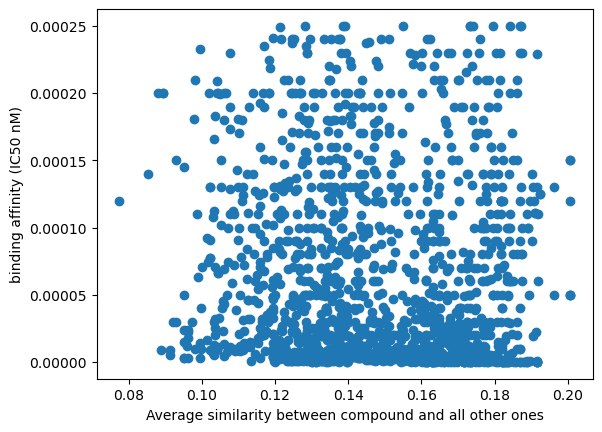

In [82]:
plt.scatter(similarity_mean, binding_affinity)
plt.xlabel('Average similarity between compound and all other ones')
plt.ylabel('binding affinity (IC50 nM)')
plt.show()

Seems to be uncorrelated : (
Try with hierarchical clustering!
Not clear, seems that 0.4 is a fair split parameter

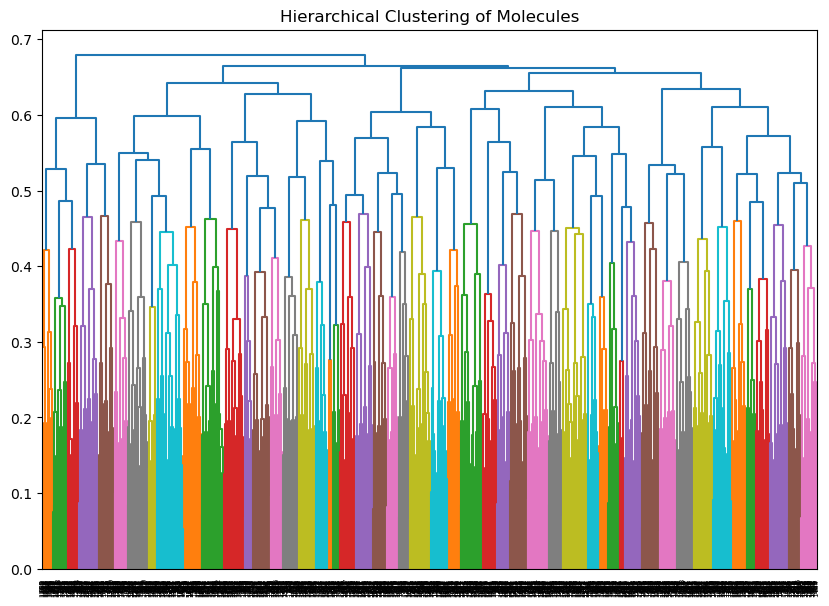

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(similarity_matrix[np.triu_indices(n, 1)], method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering of Molecules')
plt.show()

Try with k-means clustering

In [84]:
from sklearn.cluster import KMeans

k = 3  # Number of clusters, chosen based on methods like elbow or silhouette analysis
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(similarity_matrix)

Now try to see how the clusters look like

In [85]:
# Assuming 'df' is your DataFrame containing the molecules
non_numerical_df_lowIC50['Cluster'] = clusters
print(non_numerical_df_lowIC50.groupby('Cluster').size())  # Check the size of each cluster

Cluster
0    256
1    905
2    477
dtype: int64


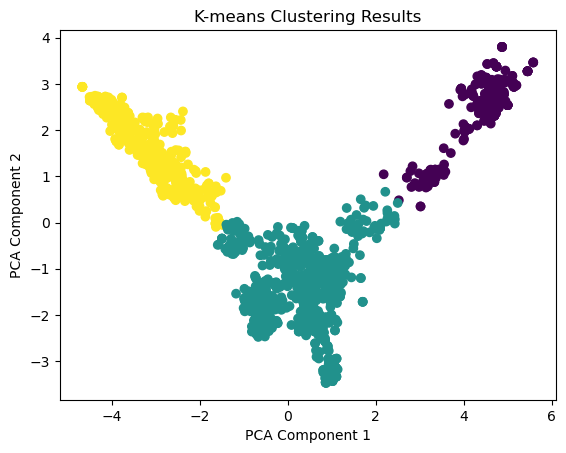

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(similarity_matrix)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

first plot that makes sense!!!!!!!!!!!!